In [8]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='6CDWVWR6X1YXSXIC', output_format='pandas')

In [20]:
data, meta_data = ts.get_daily(symbol='MSFT', outputsize='full')

In [21]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1998-01-02,129.63,131.50,129.50,131.13,4968500.0
1998-01-05,131.25,133.63,127.87,130.38,10047200.0
1998-01-06,129.75,133.00,129.25,131.13,8479300.0
1998-01-07,129.88,131.19,127.50,129.56,7686600.0
1998-01-08,128.63,132.13,127.50,130.50,9702400.0


In [22]:
data.shape


(5254, 5)

In [27]:
list(data)

['1. open', '2. high', '3. low', '4. close', '5. volume']

Text(0.5,1,'MSFT chart')

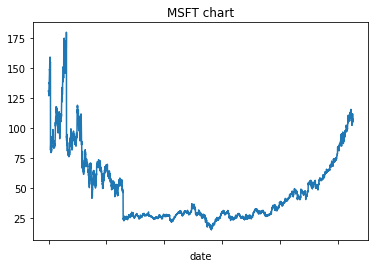

In [29]:
data['4. close'].plot()
plt.title('MSFT chart')

In [30]:
data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5254.000000,5254.000000,5254.000000,5254.000000,5.254000e+03
mean,48.656655,49.254744,48.061616,48.670055,4.755021e+07
std,29.157515,29.605741,28.688170,29.178588,2.889099e+07
min,15.200000,15.620000,14.870000,15.150000,3.458100e+06
25%,27.050000,27.272500,26.850000,27.070000,2.790108e+07
50%,34.500000,34.805000,34.120000,34.465000,4.279235e+07
75%,63.437500,64.120000,62.667500,63.380000,6.013320e+07
max,178.940000,180.380000,175.750000,179.940000,5.910522e+08


In [35]:
import pandas as pd
rm_20 = data['4. close'].rolling(window=20).mean()
rm_100 = data['4. close'].rolling(window=100).mean()

In [41]:
rm_20.head()

date
1998-01-02   NaN
1998-01-05   NaN
1998-01-06   NaN
1998-01-07   NaN
1998-01-08   NaN
Name: 4. close, dtype: float64

In [43]:
rm_100.tail()

date
2018-11-09    107.9583
2018-11-12    108.0156
2018-11-13    108.0809
2018-11-14    108.1467
2018-11-15    108.2288
Name: 4. close, dtype: float64

In [45]:
forecast_out = int(30)
data['Prediction'] = data[['4. close']].shift(-forecast_out)

In [46]:
data.tail()

,1. open,2. high,3. low,4. close,5. volume,Prediction
date,,,,,,
2018-11-09,110.85,111.45,108.7600,109.57,32039223.0,NaN
2018-11-12,109.42,109.96,106.1000,106.87,33621807.0,NaN
2018-11-13,107.55,108.74,106.6400,106.94,35374583.0,NaN
2018-11-14,108.10,108.26,104.4700,104.97,39451205.0,NaN
2018-11-15,104.99,107.32,103.9148,107.29,21073552.0,NaN


In [49]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm
X = np.array(data.drop(['Prediction'], 1))
X = preprocessing.scale(X)

C:\Users\arpit\Anaconda2\envs\py36new\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

In [52]:
y = np.array(data['Prediction'])
y = y[:-forecast_out]

In [53]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [54]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9069323534016295


In [55]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[104.50864644 103.32295323 105.64046672 101.91366543 100.75753174
 102.03356931 101.90115353 103.27628857 103.4748766  102.67108667
 104.23711391 102.93293384  99.02672631  98.58106548 100.27186137
 100.27290843  98.21234914  92.88714292 100.53276779 100.01651893
  99.42341179 100.33985647 101.66351068 103.84332057 104.44767624
 103.49861667 102.00912861 101.88272537 100.1858711   99.27779217]
